In [13]:

from pymatgen.core.operations import SymmOp
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
with MPRester("ktopgq8J6C3OwUSa") as m:
    structure = m.get_structure_by_material_id("mp-23205")
    w = CifWriter(structure)
    w.write_file('mp23205.cif')
    
    print("Transformation matrix, C3 axis (rotation d'ordre 3) on I1 (0.33 0.67 0.22) :")
    symmetry_1 = SymmOp.from_xyz_string("-y,x-y,z") 
    print(symmetry_1.affine_matrix)
    print(" ")
    
    print("Transformation matrix, mirror plane (plan mirroir) on I1 (0.67 0.33 0.78) :")
    symmetry_2 = SymmOp.from_xyz_string("-y,-x,z")
    print(symmetry_2.affine_matrix)   
    print(" ")
    
    print("Transformation matrix, 3-bar axis (rotoinversion d'ordre 3) on Mg0 (0 1 0) :")
    symmetry_3 = SymmOp.from_xyz_string("y,-x+y,-z") 
    print(symmetry_3.rotation_matrix)
    print(" ")
    print("---------------------------------------------------------------")
    print(" ")
    


Transformation matrix, C3 axis (rotation d'ordre 3) on I1 (0.33 0.67 0.22) :
[[ 0. -1.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
 
Transformation matrix, mirror plane (plan mirroir) on I1 (0.67 0.33 0.78) :
[[ 0. -1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
 
Transformation matrix, 3-bar axis (rotoinversion d'ordre 3) on Mg0 (0 1 0) :
[[ 0.  1.  0.]
 [-1.  1.  0.]
 [ 0.  0. -1.]]
 
---------------------------------------------------------------
 


MgI2 without transformation


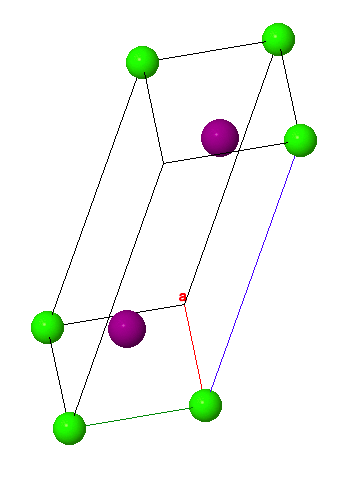

In [19]:
from IPython.display import Image
print("MgI2 without transformation")
Image(filename='basic.png')


C3 axis (rotation d'ordre 3) on I1 (0.33 0.67 0.22) :
Rotation vector in red


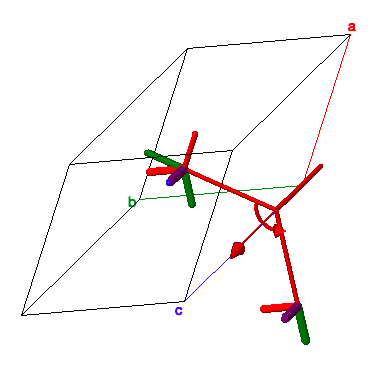

In [20]:
from IPython.display import Image
print("C3 axis (rotation d'ordre 3) on I1 (0.33 0.67 0.22) :")
print("Rotation vector in red")
Image(filename='C3_axis_I1.png')

Mirror plane (plan mirroir) on I1 (0.67 0.33 0.78)
Atom position after trasformation is given by blue vector 


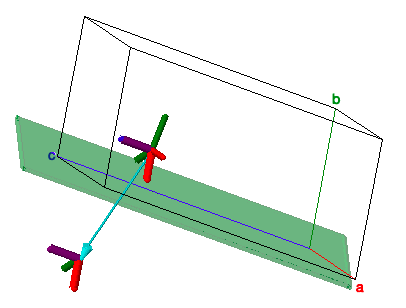

In [16]:
from IPython.display import Image
print("Mirror plane (plan mirroir) on I1 (0.67 0.33 0.78)")
print("Atom position after trasformation is given by blue vector ")
Image(filename='Mirror_plane_I1.png')

3-bar axis (rotoinversion d'ordre 3) on Mg0 (0 1 0):
Atom position after trasformation is given by blue vector
and by the rotation center in yellow


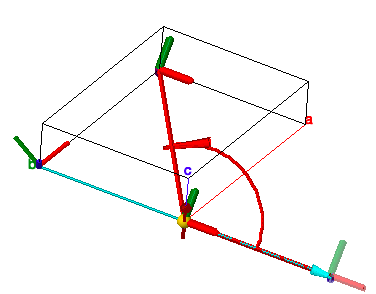

In [17]:
from IPython.display import Image
print("3-bar axis (rotoinversion d'ordre 3) on Mg0 (0 1 0):")
print("Atom position after trasformation is given by blue vector")
print("and by the rotation center in yellow")
Image(filename='3bar_axis_Mg0.png')